# Анализ популярного сервиса аренды самокатов GoFast

## Описание проекта

Задача провести анализ работы популярного сервиса аренды самокатов GoFast. Нам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. 
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки 


абонентская плата отсутствует;
стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra


абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.

### Описание данных

В основных данных есть информация о пользователях, их поездках и подписках.


**Пользователи — users_go.csv**

- user_id - уникальный идентификатор пользователя
- name - имя пользователя
- age - возраст
- city - город
- subscription_type - тип подписки (free, ultra)

**Поездки — rides_go.csv**


- user_id - уникальный идентификатор пользователя
- distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date - дата совершения поездки


**Подписки — subscriptions_go.csv**


- subscription_type - тип подписки
- minute_price - стоимость одной минуты поездки по данной подписке
- start_ride_price - стоимость начала поездки
- subscription_fee - стоимость ежемесячного платежа

### Задачи проекта
1. Загрузить данные и получить общую информацию о данных.
2. Провести необходимую предобработку данных.  
3. Провести исследовательский анализ данных. Описать и визуализировать общую информацию о пользователях и поездках:
    - 3.1 частота встречаемости городов;
    - 3.2 соотношение пользователей с подпиской и без подписки;
    - 3.3 возраст пользователей;
    - 3.4 расстояние, которое пользователь преодолел за одну поездку;
    - 3.5 продолжительность поездок.
4. Объединить данные о пользователях, поездках и подписках и разделить их по пользователям без подписки и с подпиской. Визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий.
5. Подсчитать помесячную выручку для каждого пользователя.
6. Проверить гипотезы о том, что пользователи с подпиской испльзую самокаты больше по времени и приносят больше выручки. 

## 1. Загрузка данных

In [1]:
# загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# загрузим данные
try:
    users = pd.read_csv('....csv') 
except:
    users = pd.read_csv('https://....csv')
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
try:
    rides = pd.read_csv('....csv', parse_dates=['date']) 
except:
    rides = pd.read_csv('....csv', parse_dates=['date']) 
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
try:
    subscriptions = pd.read_csv('....csv') 
except:
    subscriptions = pd.read_csv('https://....csv') 
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [6]:
# получим общую информацию о данных
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [7]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [8]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


### Выводы

Пропусков в данных нет. Нужно привести столбец date к типу дата.

## 2. Предобработка данных

In [9]:
# изменим тип данных на дату   
rides['date'] = pd.to_datetime(rides['date'])
rides['date'].dtype

dtype('<M8[ns]')

In [10]:
# посмотрим на временной период
rides['date'].min(), rides['date'].max()

(Timestamp('2021-01-01 00:00:00'), Timestamp('2021-12-30 00:00:00'))

In [11]:
# добавим столбец с номером месяца
rides['month'] = pd.to_datetime(rides['date']).dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### Проверка дубликатов 

#### Таблица users

In [12]:
# проверка наличия явных дубликатов
users.duplicated().sum()

31

In [13]:
# удалим дубликаты 
users = users.drop_duplicates()

In [14]:
users.duplicated().sum() # проверим удаление

0

In [15]:
users.info() # проверим удаление

<class 'pandas.core.frame.DataFrame'>
Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


In [16]:
# проверим неявные дубликаты
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Дубликатов нет

#### Таблица rides

In [17]:
# проверка наличия явных дубликатов
rides.duplicated().sum()

0

Дубликатов нет

#### Таблица subscriptions

In [18]:
# проверка наличия явных дубликатов
subscriptions.duplicated().sum()

0

Дубликатов нет

### Выводы
Выполнена предобработка данных. Был изменен тип данных и удалены дубликаты.

## 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках:
- 3.1 частота встречаемости городов;
- 3.2 соотношение пользователей с подпиской и без подписки;
- 3.3 возраст пользователей;
- 3.4 расстояние, которое пользователь преодолел за одну поездку;
- 3.5 продолжительность поездок.

### 3.1 частота встречаемости городов

In [19]:
# выберем тему seaborn
sns.set_theme()

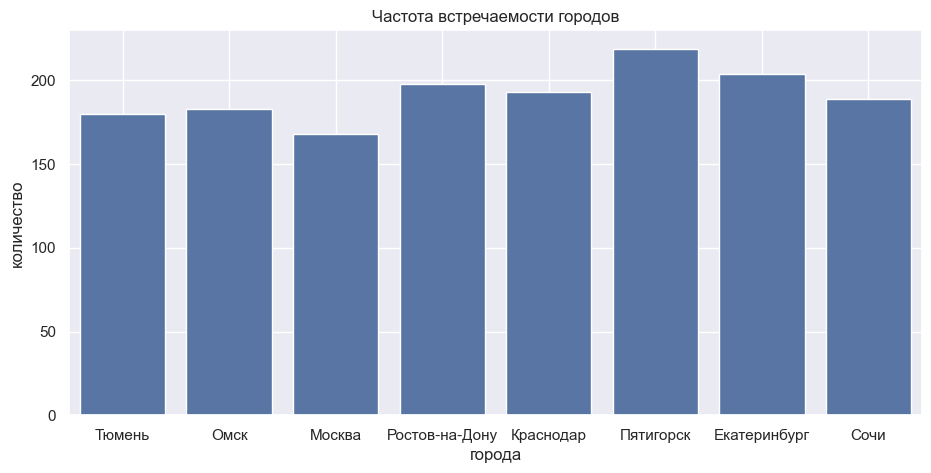

In [20]:
# частота встречаемости городов
fig, ax = plt.subplots(figsize=(11, 5))
sns.countplot(data=users, x='city', color='b')
ax.set(title = 'Частота встречаемости городов', xlabel = 'города', ylabel = 'количество')
plt.grid(True);

Города представлены относительно равномерно

In [21]:
# таблица со значениями частотности городов
users['city'].value_counts().sort_values()

city
Москва            168
Тюмень            180
Омск              183
Сочи              189
Краснодар         193
Ростов-на-Дону    198
Екатеринбург      204
Пятигорск         219
Name: count, dtype: int64

#### 3.2 Cоотношение пользователей с подпиской и без подписки

In [22]:
# соотношение пользователей с подпиской и без
users['subscription_type'].value_counts()

subscription_type
free     835
ultra    699
Name: count, dtype: int64

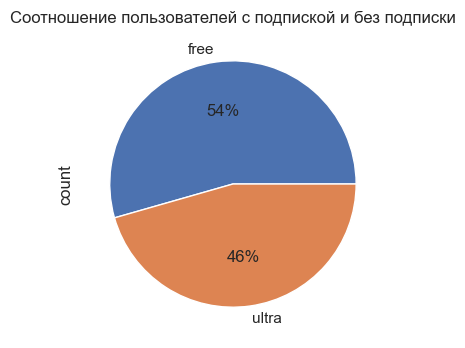

In [23]:
# круговая диаграмма
fig, ax = plt.subplots(figsize=(4,4))
ax.set(title = 'Соотношение пользователей с подпиской и без подписки')
users['subscription_type'].value_counts().plot.pie(autopct='%1.0f%%');

#### 3.3 возраст пользователей

24.903520208604956

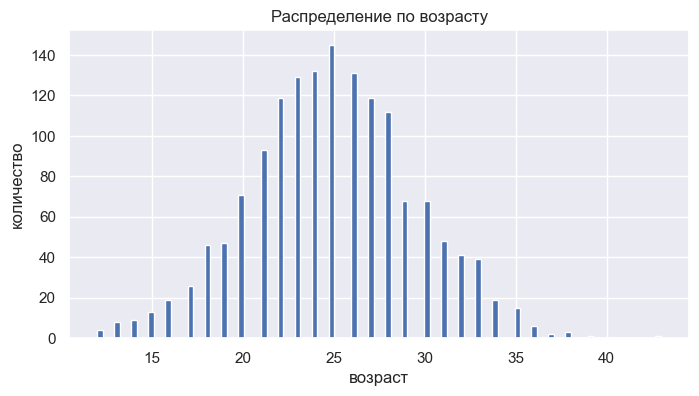

In [24]:
# возраст пользователей
fig, ax = plt.subplots(figsize=(8, 4))
users['age'].hist(bins=100)
ax.set(title = 'Распределение по возрасту', xlabel = 'возраст', ylabel = 'количество');
users['age'].mean()

Распределение возраста пользователей очень близко к нормальному распределению

In [25]:
# посмотрим на описательную статистику данных возраста пользователей
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

#### 3.4 расстояние, которое пользователь преодолел за одну поездку

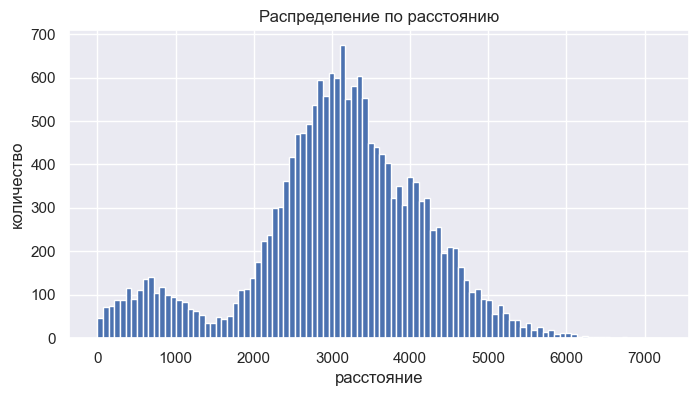

In [26]:
# распределение по расстоянию
fig, ax = plt.subplots(figsize=(8, 4))
rides['distance'].hist(bins=100)
ax.set(title = 'Распределение по расстоянию', xlabel = 'расстояние', ylabel = 'количество');

Распределение по расстоянию тоже близко к номральному, но имеется небольшой бугорок в левой части.

#### 3.5 Продолжительность поездок

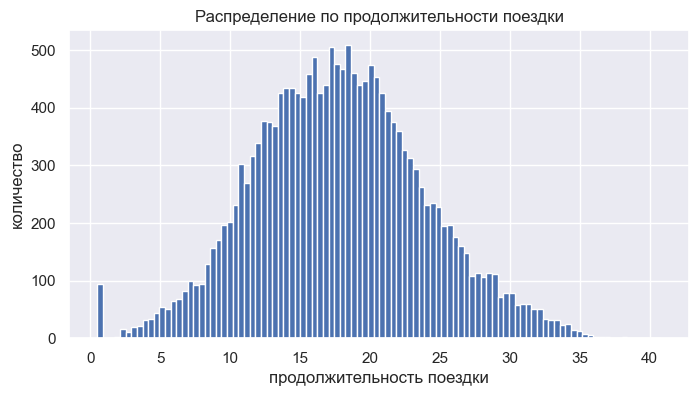

In [27]:
# распределение по продолжительности поездки
fig, ax = plt.subplots(figsize=(8, 4))
rides['duration'].hist(bins=100)
ax.set(title = 'Распределение по продолжительности поездки', xlabel = 'продолжительность поездки', ylabel = 'количество');

Распределение продолжительности поездок блико к нормальному, за исключением небольшого выброса с левой стороны, который вызывает вопросы - очень похоже на аномалию.

### 4. Объединение данных

In [28]:
# объединим данные и проверим количество строк и столбцов
df = users.merge(rides)
df

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11


In [29]:
# добавим таблицу subscriptions
df = df.merge(subscriptions)
df

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [30]:
# чтобы проверить аномально низкую продолжительность поездки (в районе минуты) добавим столбец скорость (км/час)
df['speed'] = df['distance'] / df['duration'] /1000 * 60

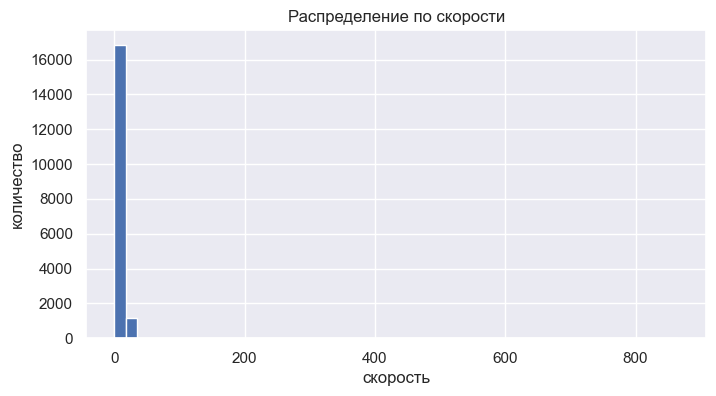

In [31]:
# построим распределение по скорости
fig, ax = plt.subplots(figsize=(8, 4))
ax.set(title = 'Распределение по скорости', xlabel = 'скорость', ylabel = 'количество');
df['speed'].hist(bins = 50);

Мы видим аномалии. Посмотрим на интервал от 0 до 30 км/час и от 30 до 900 км/час

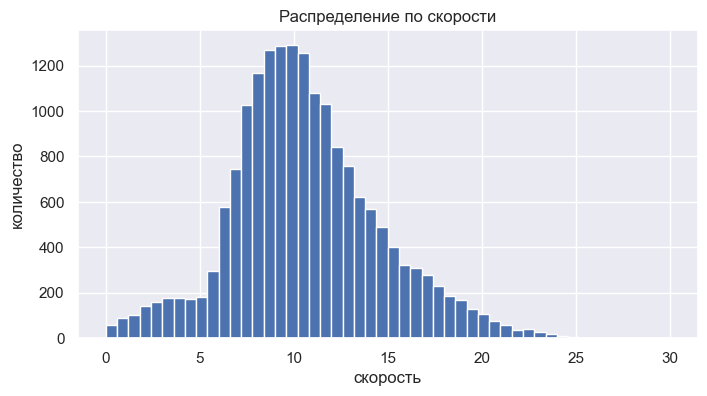

In [32]:
# распределение по скорости в интервале от 0 до 30 км/час
fig, ax = plt.subplots(figsize=(8, 4))
ax.set(title = 'Распределение по скорости', xlabel = 'скорость', ylabel = 'количество');
df['speed'].hist(bins = 50, range=(0, 30));

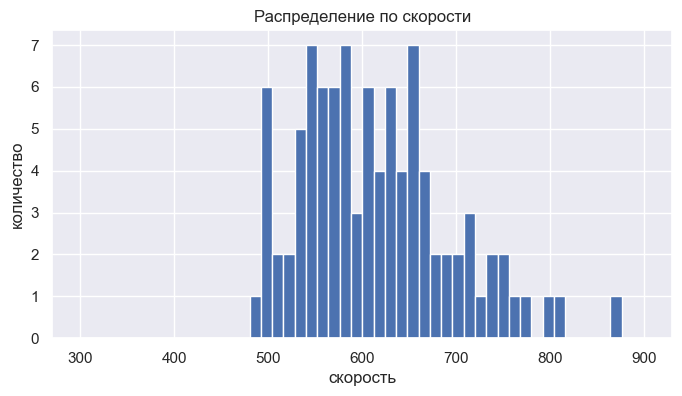

In [33]:
# распределение по скорости в интервале от 300 до 900 км/час
fig, ax = plt.subplots(figsize=(8, 4))
ax.set(title = 'Распределение по скорости', xlabel = 'скорость', ylabel = 'количество');
df['speed'].hist(bins = 50, range=(300, 900));

In [34]:
# посмотрим на эти данные, где скорость выше 30 км/час
df.query('speed > 30')

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee,speed
6531,701,Иван,31,Екатеринбург,free,4196.445201,0.5,2021-08-31,8,8,50,0,503.573424
6570,704,Мирон,29,Ростов-на-Дону,free,4830.824371,0.5,2021-10-14,10,8,50,0,579.698925
6680,712,Дарья,28,Москва,free,4684.004397,0.5,2021-03-04,3,8,50,0,562.080528
6695,713,Святослав,30,Краснодар,free,5215.642710,0.5,2021-02-25,2,8,50,0,625.877125
6768,718,Владислава,31,Москва,free,5197.436649,0.5,2021-02-11,2,8,50,0,623.692398
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17004,1460,Жанна,27,Пятигорск,free,5531.335845,0.5,2021-01-19,1,8,50,0,663.760301
17242,1477,Ян,17,Сочи,free,6724.932981,0.5,2021-01-12,1,8,50,0,806.991958
17314,1483,Роберт,26,Екатеринбург,free,4445.481070,0.5,2021-03-06,3,8,50,0,533.457728
17505,1496,Яна,19,Москва,free,5722.551787,0.5,2021-02-14,2,8,50,0,686.706214


In [35]:
# посмотрим на описательную статистику данных, где скорость выше 30 км/час
df.query('speed > 30').describe()

,user_id,age,distance,duration,date,month,minute_price,start_ride_price,subscription_fee,speed
count,95.000000,95.000000,95.000000,95.0,95,95.000000,95.0,95.0,95.0,95.000000
mean,1092.210526,25.442105,5113.176549,0.5,2021-07-01 13:53:41.052631552,6.484211,8.0,50.0,0.0,613.581186
min,701.000000,13.000000,4030.308008,0.5,2021-01-05 00:00:00,1.000000,8.0,50.0,0.0,483.636961
25%,901.000000,22.500000,4611.510820,0.5,2021-03-16 00:00:00,3.000000,8.0,50.0,0.0,553.381298
50%,1069.000000,25.000000,5052.769411,0.5,2021-06-18 00:00:00,6.000000,8.0,50.0,0.0,606.332329
75%,1310.500000,29.000000,5488.459099,0.5,2021-10-18 12:00:00,10.000000,8.0,50.0,0.0,658.615092
max,1524.000000,36.000000,7211.007745,0.5,2021-12-27 00:00:00,12.000000,8.0,50.0,0.0,865.320929
std,244.028551,4.350876,658.254104,0.0,NaN,3.709858,0.0,0.0,0.0,78.990493


Мы получили 95 случаев, когда продолжительность поездки равняется 0,5 минутам, дистанция меняется от 4030 м до 7211 м. Все случаи для пользователей без подписки. Это похоже на програмный сбой. Данные по продолжительности поездки явно не достоверные, а по расстоянию скорее всего достоверные. Несмотря на это оставим эти данные чтобы не вносить искажения в начисление выручки.

Создадим ещё два датафрейма из датафрейма созданного выше - пользователи с подпиской и без.

In [36]:
# пользователи без подписки
df_free = df.query('subscription_type == "free"')
df_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee,speed
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0,10.100278
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0,3.130090
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0,12.003323
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0,7.396057
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0,10.491519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0,11.444601
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0,7.960158
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0,12.452969
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0,10.443489


In [37]:
# пользователи с подпиской
df_ultra = df.query('subscription_type == "ultra"')
df_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee,speed
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199,10.335841
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199,9.929620
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199,7.260713
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199,8.734644
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199,9.202888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199,9.662406
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199,12.415753
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199,12.826661
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199,17.833222


Корретно разделили пользователей, 11473 + 6500 = 17973.
Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

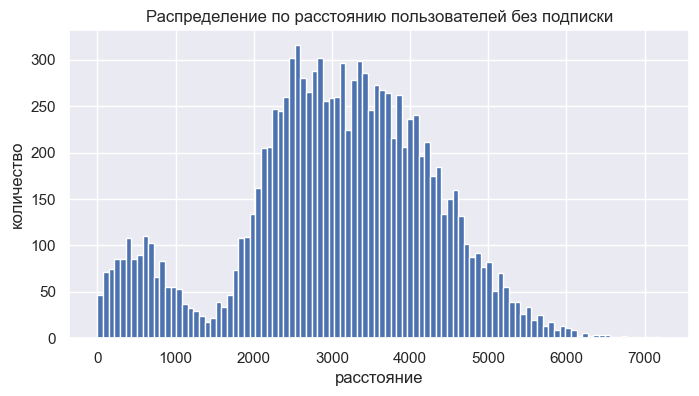

In [38]:
# распределение по расстоянию пользователей без подписки
fig, ax = plt.subplots(figsize=(8, 4))
df_free['distance'].hist(bins=100)
ax.set(title = 'Распределение по расстоянию пользователей без подписки', xlabel = 'расстояние', ylabel = 'количество');

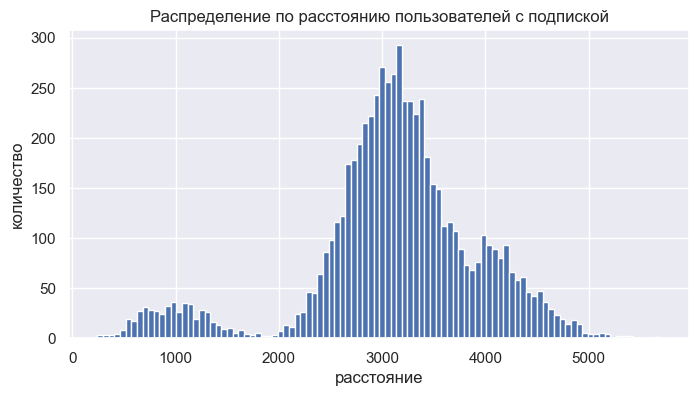

In [39]:
# распределение по расстоянию пользователей с подпиской
fig, ax = plt.subplots(figsize=(8, 4))
df_ultra['distance'].hist(bins=100)
ax.set(title = 'Распределение по расстоянию пользователей c подпиской', xlabel = 'расстояние', ylabel = 'количество');

#### Выводы:
Распределения явно различаются. Максимум распределения пользователей без подписки составляет около 2500 м, в то время как у пользователей с подпиской - примерно 3200 м.

Интересно, что распределения имеют две вершины, одна на расстоянии 700 - 1000 м, другая - 2500 - 3200 м. У пользователей с подпиской вершины явно сдвинуты вправо. У пользователей без подписки распределение шире, а с подпиской - уже. Каждая из вершин распределения относительно близка к нормальному распределению.

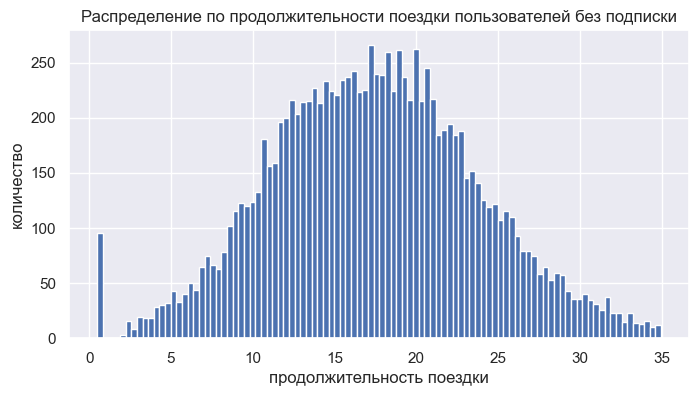

In [40]:
# распределение по продолжительности поездки пользователей без подписки
fig, ax = plt.subplots(figsize=(8, 4))
df_free['duration'].hist(bins=100)
ax.set(title = 'Распределение по продолжительности поездки пользователей без подписки', 
       xlabel = 'продолжительность поездки', ylabel = 'количество');

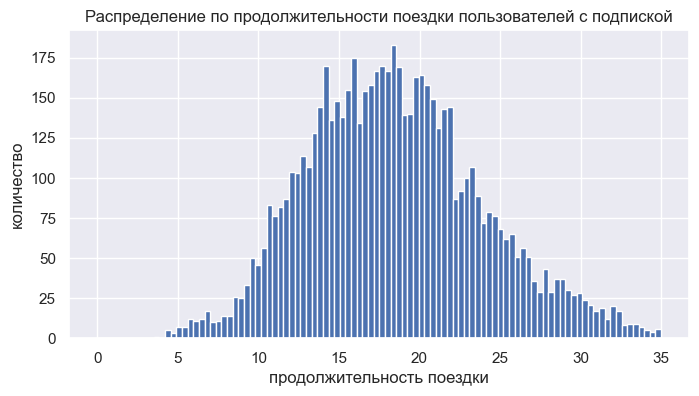

In [41]:
# распределение по продолжительности поездки пользователей с подпиской
fig, ax = plt.subplots(figsize=(8, 4))
df_ultra['duration'].hist(bins=100, range=(0, 35))
ax.set(title = 'Распределение по продолжительности поездки пользователей с подпиской', 
       xlabel = 'продолжительность поездки', ylabel = 'количество');

#### Выводы:
Распределения достаточно близки, за исключением пика в области 0,5 минут у пользователей без подписки. Распределение пользователей без подписки шире в левой части. Характер распределений близок к нормальному.

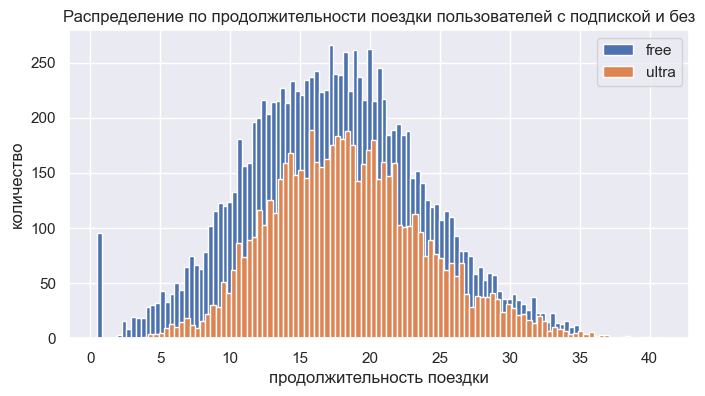

In [42]:
# распределение по продолжительности поездки пользователей без подписки и с подпиской
fig, ax = plt.subplots(figsize=(8, 4))
df_free['duration'].hist(bins=100)
df_ultra['duration'].hist(bins=100)
plt.legend(['free', 'ultra'])
ax.set(title = 'Распределение по продолжительности поездки пользователей c подпиской и без', 
       xlabel = 'продолжительность поездки', ylabel = 'количество');

### 5. Подсчёт выручки

In [43]:
# создадим столбец для подстчета количества поездок
df['count'] = 1
df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee,speed,count
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199,10.335841,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199,9.929620,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199,7.260713,1
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199,8.734644,1
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199,9.202888,1


In [44]:
# для корректного подсчета выручки нужно каждое значение из столбца duration округлить с помощью «потолка»: 
df['duration'] = np.ceil(df['duration']) 
df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee,speed,count
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199,10.335841,1
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199,9.929620,1
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199,7.260713,1
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199,8.734644,1
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199,9.202888,1


In [45]:
# сгруппируем даннные по пользователям и месяцам и получим параметры, чтобы посчитать помесячную выручку
df_revenue = df.pivot_table(index=['user_id','month'],  
                            values=['distance', 'count', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee'], 
                            aggfunc = {'distance':sum, 'count':sum, 'duration':sum, 'minute_price':'first', 
                                       'start_ride_price':'first', 'subscription_fee':'first' }).reset_index()

df_revenue

,user_id,month,count,distance,duration,minute_price,start_ride_price,subscription_fee
0,1,1,2,7027.511294,42.0,6,0,199
1,1,4,1,754.159807,7.0,6,0,199
2,1,8,2,6723.470560,46.0,6,0,199
3,1,10,2,5809.911100,32.0,6,0,199
4,1,11,3,7003.499363,56.0,6,0,199
...,...,...,...,...,...,...,...,...
11326,1534,6,2,3409.468534,26.0,8,50,0
11327,1534,8,2,7622.453034,48.0,8,50,0
11328,1534,9,1,4928.173852,23.0,8,50,0
11329,1534,11,4,13350.015305,78.0,8,50,0


In [46]:
# посчитаем помесячную выручку
df_revenue['revenue'] = (df_revenue['subscription_fee'] + df_revenue['start_ride_price'] * df_revenue['count']  + 
                         df_revenue['duration'] * df_revenue['minute_price'])

In [47]:
# проверим создание столбца с выручкой
df_revenue

,user_id,month,count,distance,duration,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,2,7027.511294,42.0,6,0,199,451.0
1,1,4,1,754.159807,7.0,6,0,199,241.0
2,1,8,2,6723.470560,46.0,6,0,199,475.0
3,1,10,2,5809.911100,32.0,6,0,199,391.0
4,1,11,3,7003.499363,56.0,6,0,199,535.0
...,...,...,...,...,...,...,...,...,...
11326,1534,6,2,3409.468534,26.0,8,50,0,308.0
11327,1534,8,2,7622.453034,48.0,8,50,0,484.0
11328,1534,9,1,4928.173852,23.0,8,50,0,234.0
11329,1534,11,4,13350.015305,78.0,8,50,0,824.0


### 6. Проверка гипотез

#### 6.1. Продолжительность поездки
Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

In [48]:
# создадим выборку времени поездки для пользователей с подпиской и найдем среднее
duration_ultra = df.query('subscription_type == "ultra"')['duration']
duration_ultra.mean()

19.037692307692307

In [49]:
# создадим выборку времени поездки для пользователей без подписки и найдем среднее
duration_free = df.query('subscription_type == "free"')['duration']
duration_free.mean()

17.890992392807746

- Нулевая гипотеза: средние значения длительностей поездок пользователей из двух групп равны.
- Альтернативная гипотеза: среднее значение длительностей поездок пользователей с подпиской больше, чем среднее значение длительностей поездок пользователей без подписки

In [50]:
import scipy.stats as st

# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(duration_ultra, duration_free, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


#### Выводы:
Среднее значение длительности поездок пользователей с подпиской больше, чем без подписки. Эти различия статистически значимы при заданном уровне значимости 5%. Здесь ответ однозначный и для любого меньшего разумного уровня значимости, так как p-value очень мал.

#### 6.2 . Расстояние
Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

In [51]:
# создадим выборку с длительностью поездки и найдем среднее
distance_ultra = df.query('subscription_type == "ultra"')['distance']
distance_ultra.mean()

3115.4453880370247

- Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку может быть, равно 3130 метров.
- Альтернативная гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, меньше 3130 метров

In [52]:
distance_value = 3130

alpha = 0.05 # уровень статистической значимости

# проводим ttest для выбороки и заданного среднего значения, в качестве альтернативной используем одностороннюю гипотезу «меньше»
results = st.ttest_1samp(
    distance_ultra, 
    distance_value,
      alternative='less')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.08046311521502146
Не отвергаем нулевую гипотезу


- Нулевая гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку может быть, равно 3130 метров.
- Альтернативная гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, больше 3130 метров

In [53]:
distance_value = 3130

alpha = 0.05 # уровень статистической значимости

# проводим ttest для выбороки и заданного среднего значения, в качестве альтернативной используем одностороннюю гипотезу «меньше»
results = st.ttest_1samp(
    distance_ultra, 
    distance_value,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


#### Выводы:
Мы должны принять нулевую гипотезу, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, может быть равно 3130 метров, и отвергнуть альтернативную гипотезу, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.

#### 6.3. Выручка
Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

In [54]:
# выборка пользователей с подпиской и среднее значение выручки
revenue_ultra = df_revenue.query('subscription_fee == 199')['revenue']
revenue_ultra.mean()

362.7921906022502

In [55]:
# выборка пользователей без подписки и среднее значение выручки
revenue_free = df_revenue.query('subscription_fee != 199')['revenue']
revenue_free.mean()

328.6413651073845

- Нулевая гипотеза: средние значения помесячной выручки пользователей из двух групп равны.
- Альтернативная гипотеза: среднее значение помесячной выручки пользователей с подпиской больше, чем среднее значение помесячной выручки пользователей без подписки.

In [56]:
# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(revenue_ultra, revenue_free, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


#### Выводы:
Среднее значение помесячной выручки пользователей с подпиской больше, чем среднее значение помесячной выручки пользователей без подписки. Различия в средних статистически значимы при уровне значимости 5%, а также и для любого меньшего разумного уровня значимости.

#### 6.4. Какой тест нужно применить?
Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

#### Ответ: 
чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, нужно применить метод scipy.stats.ttest_rel().

### 7 (необязательное задание). Распределения

#### 7.1. Рассылка промокодов
Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Нужно использовать биномиальное распределение, которое описывает указанную ситуацию. Затем подобрать подходящее значение параметра N для заданного параметра p=0.1 с помощью графиков и метода cdf() , сформулировать вывод и ответ.

Зададим параметры биномиального распределения.
Пусть n будет немного больше 1000, конкретное значение подберём такое, чтобы вероятность не получить 100 и более положительных исходов (подписок) была примерно 5%. Другими словами вероятность левого хвоста распределения (от 0 до 99) должна быть максимально приближена к 5%, но не более.

p = 0.1 - вероятность положительного исхода.

#### Биномиальное распределение

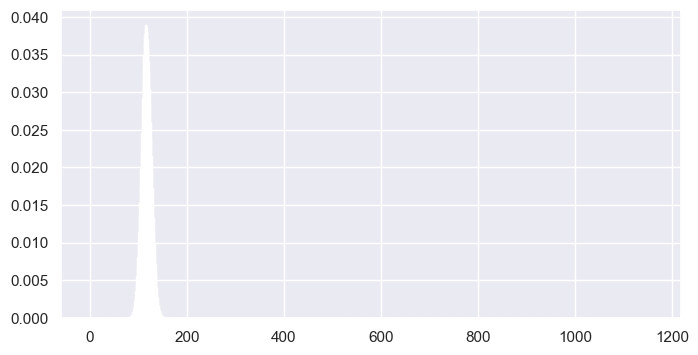

In [57]:
# построим биномиальное распределение
from scipy.stats import binom

n = 1161 # количество попыток (принимаем сами и далее подбираем)
p = 0.1 # вероятность успеха

distr = [] # сюда будем складывать вероятости получить определенное количество положительных исходов от 0 до n

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p) # используем метод binom.pmf() из модуля scipy.stats.
    distr.append(current_value)
    
fig, ax = plt.subplots(figsize=(8, 4))   
plt.bar(range(0, n+1), distr); # строим график распределения

0.049760900949903264

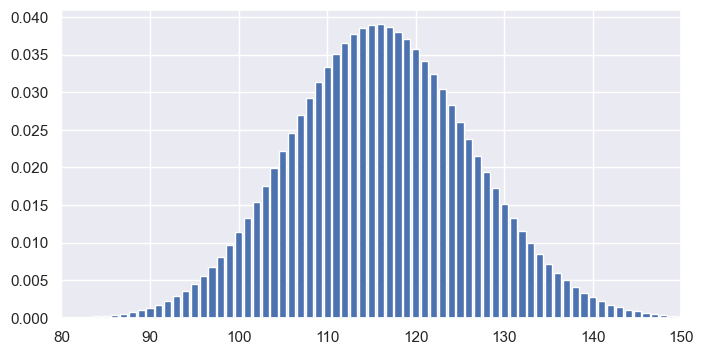

In [58]:
# посмотрим на него поближе и посчитаем вероятность
fig, ax = plt.subplots(figsize=(8, 4))   
ax.set_xlim(80, 150)
plt.bar(range(0, n+1), distr);
sum(distr[0:100]) # и посчитаем вероятность левого хвоста от 0 до 99

#### Выводы: 
1. Для того, чтобы получить 100 подписок с вероятностью не выполнить план примерно на 5%, нужно разослать не менее 1161 промокодов.

Решим эту задачу с помощью метода cdf() биномиального распределения и подбора количества промокодов не в ручную, а в цикле

In [59]:
alpha = 0.05
p = 0.10
k = 100

n = 1000  # Начнем с какого-то значения n
while binom.cdf(k - 1, n, p) > alpha:
    n += 1

print('Минимальное количество промокодов:', n)
print('Вероятность не выполнить план:', binom.cdf(k - 1, n, p))

Минимальное количество промокодов: 1161
Вероятность не выполнить план: 0.04976090094990249


#### Выводы: 
1. Для того, чтобы получить 100 подписок с вероятностью не выполнить план примерно на 5%, нужно разослать не менее 1161 промокодов. Получили такой же результат (что и должно быть).

Биномиальное распределение по внешнему виду очень похоже на нормальное распределение. Это связано с большим значением n. Это биномиальное распределение можно апроксимировать нормальным распределением и распределением Пуассона (т.к. значение р не велико, а n достаточно большое) и решить задачу с использованием метода cdf(). 

Решим эту задачу с помощью апроксимации биномиального распределения распределением Пуассона и нормальным распределением.

#### Распределение Пуассона

0.04997337763844011

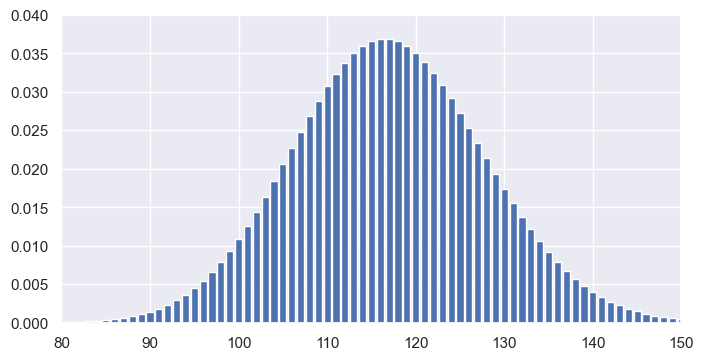

In [60]:
# построим распределение Пуассона
from scipy.stats import poisson
n = 1170
p = 0.1
lmbd = n * p
 
distr = [] # сюда будем складывать вероятости получить определенное количество положительных исходов от 0 до n

for k in range(0, n + 1):    
    p = poisson.pmf(k, lmbd) # рассчитаем вероятности этого значения с помощью метода pmf():
    distr.append(p)
 
fig, ax = plt.subplots(figsize=(8, 4))   
plt.bar(range(n + 1), distr) # построим график
ax.set_xlim(80, 150)
ax.set_ylim(0, 0.04);
sum(distr[0:100]) # и посчитаем вероятность левого хвоста от 0 до 99

#### Выводы:
1. Для того, чтобы получить 100 подписок с вероятностью не выполнить план примерно на 5%, нужно разослать не менее 1170 промокодов. (Результат изменился (по отношению к 1161) на 0,78%).
2. Решим эту же задачу с использование метода cdf().

In [61]:
# решение с помощью метода cdf()
k = 100 # число продлений подписки
p = 0.1 # вероятность продления подписки после пробного периода
alpha = 0.05 # заданная вероятность не выполнения плана 

lmbd = 100 # лямбда, начальное значение

n = 1000  # начнем с какого-то значения n
while poisson.cdf(k -1, lmbd) > alpha:
    n += 1
    lmbd = n * p

    
print('Минимальное количество промокодов:', n)
print('Вероятность не выполнить план:', poisson.cdf(k -1, lmbd))

Минимальное количество промокодов: 1170
Вероятность не выполнить план: 0.049973377638439065


#### Выводы:
1. Для того, чтобы получить 100 подписок с вероятностью не выполнить план примерно на 5%, нужно разослать не менее 1170 промокодов.


Решим эту же задачу с использованием нормального распределения и метода cdf().

#### Нормальное распределение

In [62]:
from math import sqrt
from scipy import stats as st

n = 1000 # число промокодов, зададим начальное значение
p = 0.1 # вероятность продления подписки после пробного периода
mu = n * p # математическое ожидание нормального распределения
sigma = sqrt(n * p * (1 - p)) # стандартное отклонение

distr = st.norm(mu, sigma) 

k = 100 # число подписок, границы интервала, левый хвост от 0 до 100 
        #(т.к. распределение непрерывное, то нужно брать от 100, а не от 99)

n = 1000  # начнем с какого-то значения n
while st.norm(mu, sigma).cdf(k) > alpha:
    n += 1
    mu = n * p
    sigma = sqrt(n * p * (1 - p))

    
print('Минимальное количество промокодов:', n)
print('Вероятность не выполнить план:', st.norm(mu, sigma).cdf(k))

Минимальное количество промокодов: 1169
Вероятность не выполнить план: 0.04971489312694162


#### Выводы:
1. Для того, чтобы получить 100 подписок с вероятностью не выполнить план примерно 5%, нужно разослать не менее 1169 промокодов. 
2. Методы cdf() распределения Пуассона и нормального распределения дают очень близкие результаты (1170 и 1169). Наиболее точным результатом нужно считать метод расчетаа по биномиальному распределению (1161).

#### 7.2. Push-уведомления
Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Эта ситуация тоже описывается биномиальным распределением. Воспользуемся нормальной аппроксимацией биномиального распределения и cdf() для быстрой оценки.

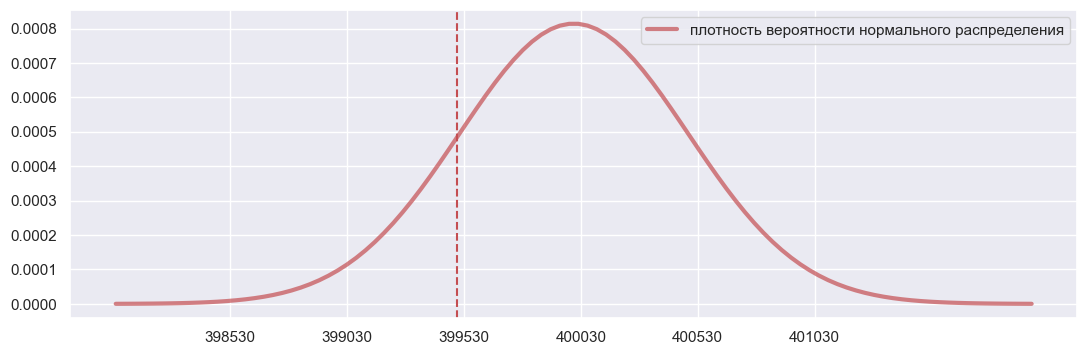

In [63]:
# Построим апроксимацию биномиального распределения нормальным 
from scipy.stats import norm
# зададим функцию, которая выдаёт <num> чисел, равномерно распределённых от <start> до <stop>
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
 
# задаём параметры биномиального распределения
n = 1000000
p = 0.4

# границы промежутка, в котором будем строить аппроксимацию - от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения # (там, где вероятности значений почти равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
fig, ax = plt.subplots(figsize=(13, 4)) 

# зададим параметры нормального распределения равными мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))
 
# рисуем график нормального распределения, получим список из 100 чисел от left до right
x = linspace(left, right, 100)
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.7, label='плотность вероятности нормального распределения')
ax.axvline(399500, color='r', linestyle='--') 
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 500))
ax.set_xticks(x_ticks)

ax.legend(loc='best')
plt.show()

In [64]:
# найдём вероятность с помощью cdf() метода нормального распределения 

n = 1000000 # число push-уведомлений
p = 0.4 # вероятность открытия push-уведомления

mu = n * p # математическое ожидание нормального распределения
sigma = sqrt(n * p * (1 - p)) # стандартное отклонение

distr = st.norm(mu, sigma) 

y = 399500 # заданное число открытий push-уведомлений, границы интервала (левый хвост от 0 до 399,5 тысяч)      

result = distr.cdf(y) # считаем вероятность получить значение от 0 до 399,5 тысяч
result

0.15371708296369768

#### Выводы:
1. Вероятность получить 399 500 открытий push-уведомлений из 1 млн. отправленных push-уведомлений составляет 15,37%.

## Выводы

В процессе исследования мы выполнили следующее.

Загрузили данные и выполнили базовый анализ данных. Данные  полные, пропусков нет. Были удалены явные дубликаты - 31 запись. 

Провели исследовательский анализ данных:
- в датесете содержатся данные об использовании популярного сервиса аренды самокатов GoFast в 8-ми городах. Города представлены относительно равномерно;
- количество пользователей с подпиской 699, без подписки - 835;
- средний возраст пользователей 24,9 года, распределение близкое к нормальному;
- посчитали помесячную выручку сервиса по каждому пользователю.


Проверили гипотезы и определили, что:
- среднее значение длительности поездок пользователей с подпиской больше, чем без подписки. Эти различия в средних статистически значимы при заданном уровне значимости 5%;
- среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров при заданном уровне значимости 5%;
- среднее значение помесячной выручки пользователей с подпиской больше, чем среднее значение помесячной выручки пользователей без подписки. Различия в средних статистически значимы при уровне значимости 5%, а также и для любого меньшего разумного уровня значимости.